In [19]:
import numpy as np
import matplotlib.pyplot as plt

<p> импульсная мощность излучаемого сигнала  150 кВт; </p>
<p> длительность импульса  0,1 мс;</p>
<p> коэффициенты усиления передающей антенны  40 дБ;</p>
<p> коэффициенты усиления приемной антенны  40 дБ;</p>
<p> длина волны  0,035 м;</p>
<p> шум-фактор приемного устройства  5 дБ;</p>
<p> потери при передаче сигнала  1,5 дБ;</p>
<p> потери при приеме сигнала  1,5 дБ;</p>
<p> потери при обработке сигнала  1 дБ.</p>
<p> вероятность ложной тревоги  10-6.</p>

Цель — самолет с отражающей поверхностью 50 м2, летящий на высоте 10 км с скоростью 200 м/с.

In [20]:
p_N = 150000 # импульсная мощность сигнала
t_p = 10**(-4) # длительность (зондирующего) импульса
in_coeff = 40 # коэффициенты усиления передающей антенны
out_coeff = 40 # коэффициенты усиления приемной антенны
l = 0.035 # длина волны
noise = 5 # шум-фактор приемного устройства (коэффициент шума)
lose_out = 1.5 # потери при передаче сигнала
lose_in = 1.5 # потери при приеме сигнала
lose_proc = 1 # потери при обработке сигнала
pred = 10**(-6) # вероятность ложной тревоги

h = 10000 # высота
v = 200 # скорость
r = 50 # средняя отр поверхность (усредненное для выбранного типа цели значение ЭПР, м^2;)
dist = 200 # начальное расстаяние 

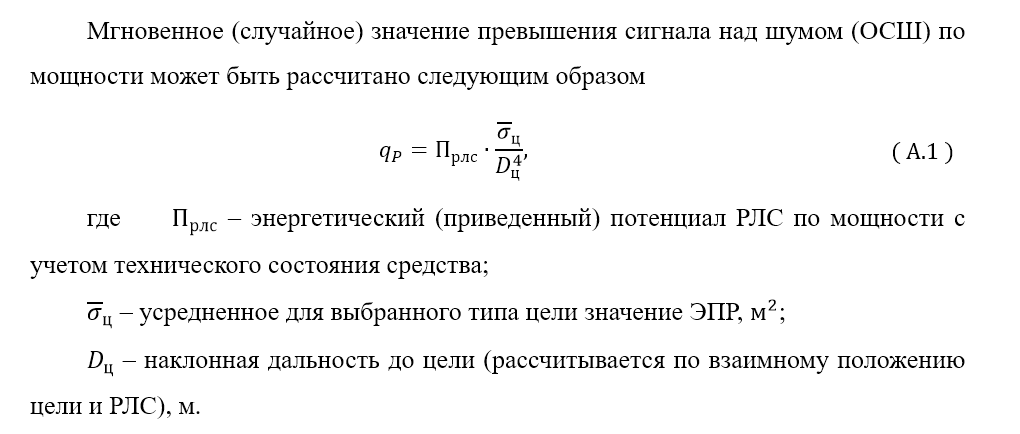

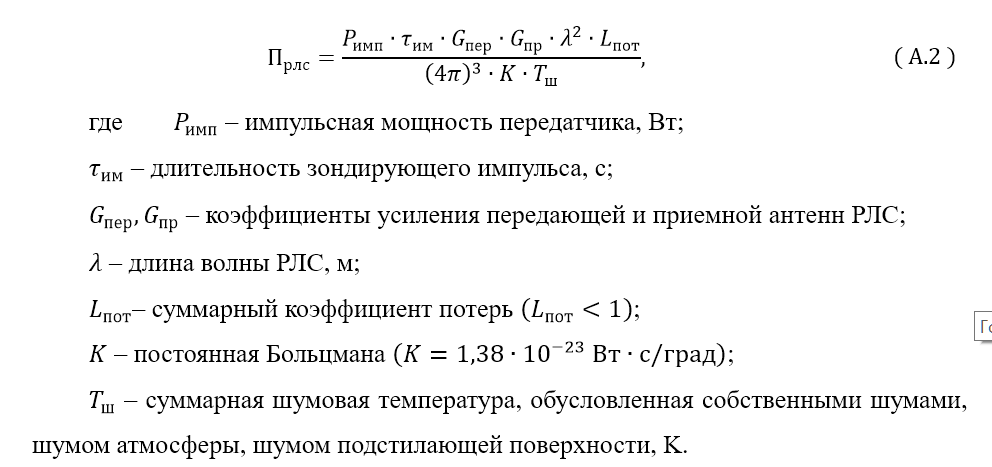

Перевод дб в разы

In [21]:
in_coeff = 10**(in_coeff/10) 
out_coeff = 10**(out_coeff/10) 

noise = 10**(noise/10) 

lose_out = 10**(lose_out/10) 
lose_in = 10**(lose_in/10) 
lose_proc = 10**(lose_proc/10) 

In [22]:
T_sh = 273*(noise-1) # приведенная ко входу шумовая температура приемного канала
lose = (lose_out + lose_in + lose_proc) #суммарный коэффициент потерь
print(lose)

4.084000501039676


In [23]:
#Потенциал РЛС
P_rls = (p_N*t_p*in_coeff*out_coeff*l*l)/(((4*np.pi)**3)*1.38*(10**(-23))*T_sh)

In [24]:
# константа для ОСШ
C = P_rls*r

C:\Users\Утёнок\AppData\Local\Temp\ipykernel_7100\3497603634.py:3: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(range_rls, [10*np.log10(C/(np.sqrt((i*1000)**2 + h**2)**4)) for i in range_rls])
C:\Users\Утёнок\AppData\Local\Temp\ipykernel_7100\3497603634.py:3: RuntimeWarning: overflow encountered in scalar add
  plt.plot(range_rls, [10*np.log10(C/(np.sqrt((i*1000)**2 + h**2)**4)) for i in range_rls])


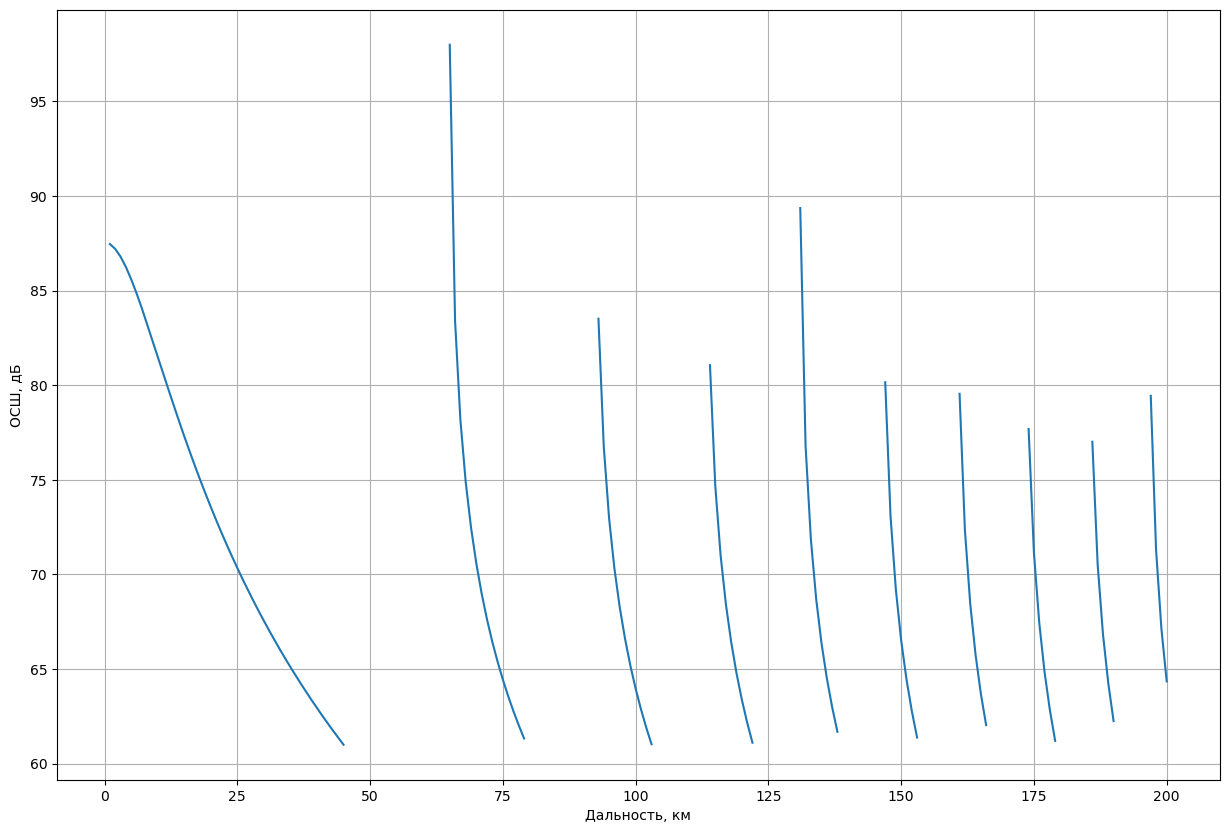

In [25]:
range_rls = np.arange(dist, 0, -1)
plt.figure(figsize=(15, 10))
plt.plot(range_rls, [10*np.log10(C/(np.sqrt((i*1000)**2 + h**2)**4)) for i in range_rls])
plt.xlabel('Дальность, км')
plt.ylabel('ОСШ, дБ')
plt.grid()